## Astro 304 (Spring 2016) "Galaxies"

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
from code.setup.setup import data_home_dir
# matplotlib parameters for plotting
from code.plot_utils import plot_pretty
from matplotlib import pylab as plt
plot_pretty()


<b> 5. (10 points) Metallicity distribution of stars in Milky Way-sized systems.</b> Given that metallicity is tracked in the model as a function of time, you can calculate the distribution of metallicities for stars formed in a given model. 

Construct such distribution for a Milky Way sized system ($M_h=10^{12}\ M_\odot$ at $z=0$) in the same models as before: no outflows, outflows of constant metallicity, outflows of varying metallicity. How does distribution of metallicities vary for these models? Describe the overall distribution of metallicities and how it compares to the metallicity of the Milky Way disk stars, which you can find in Fig 2 and Table 2 of <a href="http://adsabs.harvard.edu/abs/2012MNRAS.422.1489W">Woolf & West (2012)</a>, for example. The data file can be found <a href="http://astro.uchicago.edu/~andrey/classes/a304s18/data/woolf_west12_tab2.txt">here</a>.

Also, compare to the predictions of the closed-box model, which you can find in <a href="https://github.com/a-kravtsov/a304s18/blob/master/ex16_chemical_evolution_models.ipynb">ex16</a> notebook. 

Discuss the difference of this model from the actual model calculation and the observed metallicity distribution in the Milky Way in the context of the so-called G-dwarf "problem" (see <a href="https://github.com/a-kravtsov/a304s18/blob/master/ex16_chemical_evolution_models.ipynb">ex16</a> notebook).

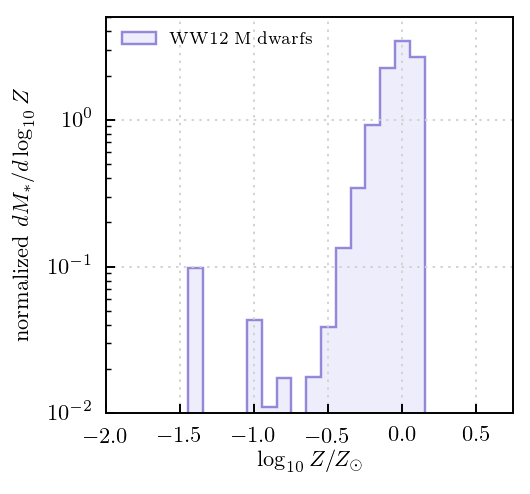

In [10]:
FeHWW, NWW, fWW = np.loadtxt(data_home_dir()+'woolf_west12_tab2.txt', usecols=(0,3,4), unpack=True)
Zbins = np.zeros(np.size(FeHWW)+1)
# prepare log bins for binning, using the same bins as in the data
Zbins[1:] = FeHWW - 0.05; Zbins[0] = FeHWW[0] + 0.05

FeHWWc = 0.5*(FeHWW[1:] + FeHWW[:-1])
fWW /= np.sum(fWW)
Zmin = np.min(FeHWWc); Zmax = np.max(FeHWWc)

yZ=0.07
Zsun = 0.0126

xlims = [-2.,0.75]; ylims=[1.e-2,5.]
fig,ax = plt.subplots(1,1, figsize=(3, 3))

ax.set_xlabel(r'$\log_{10} Z/Z_\odot$')
ax.set_ylabel(r'$\mathrm{normalized}\ dM_*/d\log_{10}Z$')
ax.set_xlim(xlims); ax.set_ylim(ylims)
ax.set_yscale('log'); #ax.set_xscale('log'); 
dh, db, dp = ax.hist(FeHWW[::-1], bins=Zbins[::-1], weights=NWW[::-1], 
                    rwidth=1, normed=True, facecolor='lavender', edgecolor='slateblue',
                    histtype='stepfilled', 
                    alpha=0.7, label=r'$\mathrm{WW12\ M\ dwarfs}$')
ax.grid(linestyle=':', c='lightgray')
    
plt.legend(frameon=False,loc='upper left', scatterpoints=1, fontsize=7)
plt.show()
